In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [16]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [17]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [18]:
train_data.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [20]:
train_data.shape

(7613, 5)

In [21]:
train_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

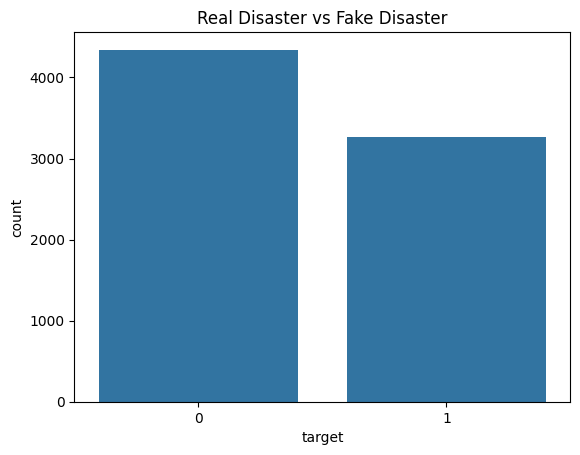

In [22]:
sns.countplot(x='target', data=train_data)
plt.title('Real Disaster vs Fake Disaster')
plt.show()

In [25]:
train_data.select_dtypes(include=['object']).columns

Index(['keyword', 'location', 'text'], dtype='object')

In [31]:
train_data.fillna({'keyword': 'None'}, inplace=True)
train_data.fillna({'location': 'None'}, inplace=True)

In [32]:
train_data.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [33]:
le = LabelEncoder()
train_data['keyword'] = le.fit_transform(train_data['keyword'])
train_data['location'] = le.fit_transform(train_data['location'])

In [34]:
train_data.head()

,id,keyword,location,text,target
0,1,0,0,Our Deeds are the Reason of this #earthquake M...,1
1,4,0,0,Forest fire near La Ronge Sask. Canada,1
2,5,0,0,All residents asked to 'shelter in place' are ...,1
3,6,0,0,"13,000 people receive #wildfires evacuation or...",1
4,7,0,0,Just got sent this photo from Ruby #Alaska as ...,1


In [38]:
vectorizer = TfidfVectorizer()
train_vector = vectorizer.fit_transform(train_data[['location','keyword']])